In [1]:
import pandas as pd

data = pd.read_csv("E:/Trip_data/RFdata_ponmalai.csv")

In [2]:
print(data.head())

   Sample  Zone  Gender  Age      Education Marital           Employment  \
0  330001     3    Male   36  Undergraduate       M     Private Employee   
1  330001     3  Female   34  Undergraduate       M  Government Employee   
2  330001     3    Male   10     Below SSLC      UM              Student   
3  330002     3    Male   45     Plus 2/ITI       M        Self Employed   
4  330002     3    Male   45     Plus 2/ITI       M        Self Employed   

          Salary License  TotalHHSIZE  ...  TwoWheeler  Car         Mode  \
0  10000 - 25000     Yes            4  ...           2    0  Two Wheeler   
1  10000 - 25000     Yes            4  ...           2    0  Two Wheeler   
2              0      No            4  ...           2    0    SchoolBus   
3        < 10000     Yes            3  ...           1    0         Walk   
4        < 10000     Yes            3  ...           1    0         Walk   

  TTIME  TDIST  TCOST  TypeActivity StartingTime EndingTime SharedRide  
0  20.0      

In [3]:
print(data.isnull().sum())

# Replace missing values with the median value of the corresponding column
data = data.fillna(data.median())

Sample          0
Zone            0
Gender          0
Age             0
Education       0
Marital         0
Employment      0
Salary          0
License         0
TotalHHSIZE     0
Working         0
TwoWheeler      0
Car             0
Mode            0
TTIME           0
TDIST           0
TCOST           0
TypeActivity    0
StartingTime    0
EndingTime      0
SharedRide      0
dtype: int64


In [4]:
# Subset the data by gender
male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']

# Most commonly used travel mode for males
male_mode = male_data['Mode'].mode()[0]
print("Most commonly used travel mode for males:", male_mode)

# Most commonly used travel mode for females
female_mode = female_data['Mode'].mode()[0]
print("Most commonly used travel mode for females:", female_mode)


Most commonly used travel mode for males: Two Wheeler
Most commonly used travel mode for females: Bus


In [5]:
# Create age categories
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '18-30', '30-40', '40-50', '50-60', '60+']
data['age_category'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Group the data by age category and travel mode, and count the number of occurrences
grouped_data = data.groupby(['age_category', 'Mode'])['Mode'].count().reset_index(name='count')

# Most commonly used travel mode for each age category
for category in labels:
    category_data = grouped_data[grouped_data['age_category'] == category]
    max_count = category_data['count'].max()
    mode = category_data[category_data['count'] == max_count]['Mode'].values[0]
    print("Most commonly used travel mode for age category", category, "is", mode, "with", max_count, "occurrences")


Most commonly used travel mode for age category 0-18 is SchoolBus with 532 occurrences
Most commonly used travel mode for age category 18-30 is Two Wheeler with 789 occurrences
Most commonly used travel mode for age category 30-40 is Two Wheeler with 866 occurrences
Most commonly used travel mode for age category 40-50 is Two Wheeler with 542 occurrences
Most commonly used travel mode for age category 50-60 is Two Wheeler with 14 occurrences
Most commonly used travel mode for age category 60+ is Two Wheeler with 17 occurrences


In [6]:
# One-hot encode the 'Gender' column
data = pd.get_dummies(data, columns=['License'])
data = pd.get_dummies(data, columns=['Gender'])
data = pd.get_dummies(data, columns=['TypeActivity'])

In [51]:
# data['Mode'].replace(['Car','Two Wheeler','Bus','PrivateVehicle','SchoolBus','Walk'],
#                          [0,1,2,3,4,5], inplace=True)
# data['Salary'].replace(['< 10000','10000 - 25000','25000 - 50000','> 50000'],
#                          [5000,17500,37500,75000], inplace=True)

In [7]:
print(data.head())

   Sample  Zone  Age      Education Marital           Employment  \
0  330001     3   36  Undergraduate       M     Private Employee   
1  330001     3   34  Undergraduate       M  Government Employee   
2  330001     3   10     Below SSLC      UM              Student   
3  330002     3   45     Plus 2/ITI       M        Self Employed   
4  330002     3   45     Plus 2/ITI       M        Self Employed   

          Salary  TotalHHSIZE  Working  TwoWheeler  ...  age_category  \
0  10000 - 25000            4        2           2  ...         30-40   
1  10000 - 25000            4        2           2  ...         30-40   
2              0            4        2           2  ...          0-18   
3        < 10000            3        1           1  ...         40-50   
4        < 10000            3        1           1  ...         40-50   

  License_No  License_Yes Gender_Female  Gender_Male TypeActivity_Education  \
0          0            1             0            1                     

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into 80% training set and 20% testing set
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [9]:
unique_targets = train_data['Mode'].unique()
print(unique_targets)


['Car' 'Two Wheeler' 'Bus' 'PrivateVehicle' 'SchoolBus' 'Walk']


In [10]:
# Loop through each column in train_data and check datatype
for col in train_data.columns:
    if train_data[col].dtype != 'float64' and train_data[col].dtype != 'int64':
        print(col, train_data[col].dtype)


Education object
Marital object
Employment object
Salary object
Mode object
TDIST object
StartingTime object
EndingTime object
SharedRide object
age_category category
License_No uint8
License_Yes uint8
Gender_Female uint8
Gender_Male uint8
TypeActivity_Education uint8
TypeActivity_Others uint8
TypeActivity_Shopping uint8
TypeActivity_others uint8
TypeActivity_work uint8


In [11]:
# Count the number of instances of each travel mode
mode_counts = data['Mode'].value_counts()

# Calculate the percentage of instances of each travel mode
mode_percentages = mode_counts / len(data) * 100

# Print the percentage of instances of each travel mode
print('Mode percentages:')
print(mode_percentages)

Mode percentages:
Two Wheeler       41.929464
Bus               15.320022
PrivateVehicle    14.536294
Walk              11.420041
SchoolBus         10.393730
Car                6.400448
Name: Mode, dtype: float64


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define the features and target variable
features = ['Age', 'License_No', 'License_Yes','TTIME', 'TCOST', 'TypeActivity_Education', 'TypeActivity_Others', 'TypeActivity_work', 'TypeActivity_Shopping', 'Gender_Female', 'Gender_Male']
target = 'Mode'

# Create the random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model on the training data
rf_model.fit(train_data[features], train_data[target])

RandomForestClassifier(max_depth=5, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score

# Predict the travel mode choices for the test data
predictions = rf_model.predict(test_data[features])
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(test_data[target], predictions)
print('Accuracy:', accuracy)

print("Predictions:")
print(predictions)

Accuracy: 0.8544776119402985
Predictions:
['Two Wheeler' 'Walk' 'Walk' ... 'Car' 'Bus' 'Bus']


In [18]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix for the predictions
conf_mat = confusion_matrix(test_data[target], predictions)

# Print the confusion matrix
# print('Confusion Matrix:')
# print(conf_mat)

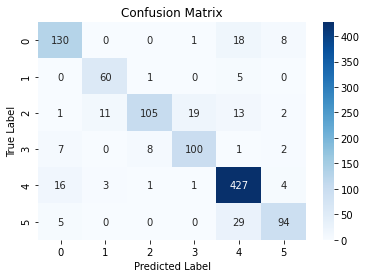

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()